In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import mstats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from matplotlib.pyplot import figure

C:\Users\Gebruiker\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
pip list

Package                            Version             
---------------------------------- --------------------
-ffi                               1.12.3              
aiohttp                            3.8.1               
aiosignal                          1.2.0               
alabaster                          0.7.12              
anaconda-client                    1.7.2               
anaconda-navigator                 2.3.2               
anaconda-project                   0.8.3               
anyio                              3.5.0               
appdirs                            1.4.4               
argon2-cffi                        21.3.0              
argon2-cffi-bindings               21.2.0              
arrow                              1.2.3               
asn1crypto                         1.0.1               
astroid                            2.11.7              
astropy                            3.2.1               
async-generator                    1.10         

In [3]:
data = pd.read_excel('Final dataset for real3.xlsx', index_col = 0)
data = data.reset_index()

In [4]:
data.count()

Company name           21233
Country ISO code       21233
Nr. of Tax Treaties    21233
NACE Rev. 2            21170
Operating revenue      19609
Number of employees    13013
PBT                    21233
Total assets           21224
ROA                    19716
No of subsidiaries     21233
Solvency ratio         20407
Long term debt         18793
Debtors                21121
Current liabilities    21132
Size                   21233
Accounting practice    21233
Degree                 18639
Closeness              18639
Betweenness            18639
Eigenvector            18639
Hubs                   18639
ETR                    21233
dtype: int64

In [5]:
data['Country ISO code'] = data['Country ISO code'].astype('category')
data['Size'] = data['Size'].astype('category')
data['Accounting practice'] = data['Accounting practice'].astype('category')
data['NACE Rev. 2'] = data['NACE Rev. 2'].astype('category')

X = data[["Nr. of Tax Treaties","NACE Rev. 2","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities", "Size","Accounting practice","Degree","Closeness","Betweenness","Eigenvector"]]
y = data["ETR"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 2031996, shuffle = True)

X_train_con = X_train[["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]]
X_train_na = X_train[["Degree", "Closeness", "Betweenness", "Eigenvector"]]
X_train_cat = X_train[['NACE Rev. 2', 'Size', 'Accounting practice']]

scaler_con = StandardScaler()
scaler_con.fit(X_train_con)
scaler_na = StandardScaler()
scaler_na.fit(X_train_na)
StandardScaler()
X_train_con = scaler_con.transform(X_train_con)

X_train_na = pd.DataFrame(scaler_na.transform(X_train_na), index = X_train.index)
X_train_na.columns = ["Degree", "Closeness", "Betweenness", "Eigenvector"]

iim=IterativeImputer(
initial_strategy='median',
max_iter=10,
missing_values= np.nan,
random_state=2031996)

imputed_X_train_con = pd.DataFrame(iim.fit_transform(X_train_con), index = X_train.index)
imputed_X_train_con.columns = ["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]
imputed_X_train_cat = pd.get_dummies(X_train_cat)

drop_na = pd.concat([imputed_X_train_con, imputed_X_train_cat, X_train_na, y_train], axis = 1)
drop_na = drop_na.dropna()
drop_na = pd.DataFrame(drop_na)

X_train_final = drop_na.loc[:,:"Eigenvector"]
y_train_final = drop_na['ETR']

X_test_con = X_test[["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]]
X_test_na = X_test[["Degree", "Closeness", "Betweenness", "Eigenvector"]]
X_test_cat = X_test[['NACE Rev. 2', 'Size', 'Accounting practice']]

X_test_con = scaler_con.transform(X_test_con)

X_test_na = pd.DataFrame(scaler_na.transform(X_test_na), index = X_test.index)
X_test_na.columns = ["Degree", "Closeness", "Betweenness", "Eigenvector"]

imputed_X_test_con = pd.DataFrame(iim.transform(X_test_con), index = X_test.index)
imputed_X_test_con.columns = ["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]
imputed_X_test_cat = pd.get_dummies(X_test_cat)

drop_na = pd.concat([imputed_X_test_con, imputed_X_test_cat, X_test_na, y_test], axis = 1)
drop_na = drop_na.dropna()
drop_na = pd.DataFrame(drop_na)

X_test_final = drop_na.loc[:,:"Eigenvector"]
y_test_final = drop_na['ETR']

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
print('Imputed' , X_train_final.shape, y_train_final.shape)
print('Imputed_test' , X_test_final.shape, y_test_final.shape)

Train (16986, 18) (16986,)
Test (4247, 18) (4247,)
Imputed (14904, 33) (14904,)
Imputed_test (3735, 33) (3735,)


In [6]:
def winsorize(dataframe, upper, lower, column_to_winsor):
    dataframe = dataframe.sort_values(column_to_winsor, ascending=False, ignore_index = True)
    amount = dataframe[column_to_winsor].count()
    up = int(amount * (upper/100))
    low = int(amount * (lower/100))
    data_winsor = dataframe.loc[low:up]
    return data_winsor

data_winsor = winsorize(data, 99,  1, 'ETR') 
data_winsor = winsorize(data_winsor, 99, 1, "Operating revenue")
data_winsor = winsorize(data_winsor, 99, 1, "Total assets")
data_winsor = winsorize(data_winsor, 99, 1, "Current liabilities")
data_winsor = winsorize(data_winsor, 99, 1, "Betweenness")
data_winsor = winsorize(data_winsor, 99, 1, "Long term debt")
data_winsor = winsorize(data_winsor, 99, 1, "PBT")

X_winsor = data_winsor[["Nr. of Tax Treaties","NACE Rev. 2","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities", "Size","Accounting practice","Degree","Closeness","Betweenness","Eigenvector"]]
y_winsor = data_winsor["ETR"]

X_train_winsor, X_test_winsor, y_train_winsor, y_test_winsor = train_test_split(X_winsor, y_winsor, test_size=0.20, random_state= 2031996, shuffle = True)

X_train_con_winsor = X_train_winsor[["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]]
X_train_na_winsor = X_train_winsor[["Degree", "Closeness", "Betweenness", "Eigenvector"]]
X_train_cat_winsor = X_train_winsor[['NACE Rev. 2', 'Size', 'Accounting practice']]

scaler_con_winsor = StandardScaler()
scaler_con_winsor.fit(X_train_con_winsor)
scaler_na_winsor = StandardScaler()
scaler_na_winsor.fit(X_train_na_winsor)
StandardScaler()
X_train_con_winsor = scaler_con_winsor.transform(X_train_con_winsor)

X_train_na_winsor = pd.DataFrame(scaler_na_winsor.transform(X_train_na_winsor), index = X_train_winsor.index)
X_train_na_winsor.columns = ["Degree", "Closeness", "Betweenness", "Eigenvector"]

iim=IterativeImputer(
initial_strategy='median',
max_iter=10,
missing_values= np.nan,
random_state=2031996)

imputed_X_train_con_winsor = pd.DataFrame(iim.fit_transform(X_train_con_winsor), index = X_train_winsor.index)
imputed_X_train_con_winsor.columns = ["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]
imputed_X_train_cat_winsor = pd.get_dummies(X_train_cat_winsor)

drop_na_winsor = pd.concat([imputed_X_train_con_winsor, imputed_X_train_cat_winsor, X_train_na_winsor, y_train_winsor], axis = 1)
drop_na_winsor = drop_na_winsor.dropna()
drop_na_winsor = pd.DataFrame(drop_na_winsor)

X_train_final_winsor = drop_na_winsor.loc[:,:'Eigenvector']
y_train_final_winsor = drop_na_winsor['ETR']

X_test_con_winsor = X_test_winsor[["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]]
X_test_na_winsor = X_test_winsor[["Degree", "Closeness", "Betweenness", "Eigenvector"]]
X_test_cat_winsor = X_test_winsor[['NACE Rev. 2', 'Size', 'Accounting practice']]

X_test_con_winsor = scaler_con_winsor.transform(X_test_con_winsor)

X_test_na_winsor = pd.DataFrame(scaler_na_winsor.transform(X_test_na_winsor), index = X_test_winsor.index)
X_test_na_winsor.columns = ["Degree", "Closeness", "Betweenness", "Eigenvector"]

imputed_X_test_con_winsor = pd.DataFrame(iim.transform(X_test_con_winsor), index = X_test_winsor.index)
imputed_X_test_con_winsor.columns = ["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]
imputed_X_test_cat_winsor = pd.get_dummies(X_test_cat_winsor)

drop_na_winsor = pd.concat([imputed_X_test_con_winsor, imputed_X_test_cat_winsor, X_test_na_winsor, y_test_winsor], axis = 1)
drop_na_winsor = pd.DataFrame(drop_na_winsor)

X_test_final_winsor = drop_na_winsor.loc[:,:'Eigenvector']
y_test_final_winsor = drop_na_winsor['ETR']

print('Train', X_train_winsor.shape, y_train_winsor.shape)
print('Test', X_test_winsor.shape, y_test_winsor.shape)
print('Imputed' , X_train_final_winsor.shape, y_train_final_winsor.shape)
print('Imputed' , X_test_final_winsor.shape, y_test_final_winsor.shape)

Train (11108, 18) (11108,)
Test (2778, 18) (2778,)
Imputed (11108, 33) (11108,)
Imputed (2778, 33) (2778,)


In [7]:
def winsorize(dataframe, upper, lower, column_to_winsor):
    dataframe = dataframe.sort_values(column_to_winsor, ascending=False, ignore_index = True)
    amount = dataframe[column_to_winsor].count()
    up = int(amount * (upper/100))
    low = int(amount * (lower/100))
    data_winsor = dataframe.loc[low:up]
    return data_winsor

data_winsor2 = winsorize(data, 97.5,  4, 'ETR') 
data_winsor2 = winsorize(data_winsor2, 100,  4, "Operating revenue")
data_winsor2 = winsorize(data_winsor2, 100,  4, "Total assets")
data_winsor2 = winsorize(data_winsor2, 100,  4, "Current liabilities")
data_winsor2 = winsorize(data_winsor2, 100,  4, "Betweenness")
data_winsor2 = winsorize(data_winsor2, 100,  4, "Long term debt")
data_winsor2 = winsorize(data_winsor2, 97.5,  2.5, "PBT")

X_winsor2 = data_winsor2[["Nr. of Tax Treaties","NACE Rev. 2","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities", "Size","Accounting practice","Degree","Closeness","Betweenness","Eigenvector"]]
y_winsor2 = data_winsor2["ETR"]

X_train_winsor2, X_test_winsor2, y_train_winsor2, y_test_winsor2 = train_test_split(X_winsor2, y_winsor2, test_size=0.20, random_state= 2031996, shuffle = True)

X_train_con_winsor2 = X_train_winsor2[["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]]
X_train_na_winsor2 = X_train_winsor2[["Degree", "Closeness", "Betweenness", "Eigenvector"]]
X_train_cat_winsor2 = X_train_winsor2[['NACE Rev. 2', 'Size', 'Accounting practice']]

scaler_con_winsor2 = StandardScaler()
scaler_con_winsor2.fit(X_train_con_winsor2)
scaler_na_winsor2 = StandardScaler()
scaler_na_winsor2.fit(X_train_na_winsor2)
StandardScaler()
X_train_con_winsor2 = scaler_con_winsor2.transform(X_train_con_winsor2)

X_train_na_winsor2 = pd.DataFrame(scaler_na_winsor2.transform(X_train_na_winsor2), index = X_train_winsor2.index)
X_train_na_winsor2.columns = ["Degree", "Closeness", "Betweenness", "Eigenvector"]

iim=IterativeImputer(
initial_strategy='median',
max_iter=10,
missing_values= np.nan,
random_state=2031996)

imputed_X_train_con_winsor2 = pd.DataFrame(iim.fit_transform(X_train_con_winsor2), index = X_train_winsor2.index)
imputed_X_train_con_winsor2.columns = ["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]
imputed_X_train_cat_winsor2 = pd.get_dummies(X_train_cat_winsor2)

drop_na_winsor2 = pd.concat([imputed_X_train_con_winsor2, imputed_X_train_cat_winsor2, X_train_na_winsor2, y_train_winsor2], axis = 1)
drop_na_winsor2 = drop_na_winsor2.dropna()
drop_na_winsor2 = pd.DataFrame(drop_na_winsor2)

X_train_final_winsor2 = drop_na_winsor2.loc[:,:'Eigenvector']
y_train_final_winsor2 = drop_na_winsor2['ETR']

X_test_con_winsor2 = X_test_winsor2[["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]]
X_test_na_winsor2 = X_test_winsor2[["Degree", "Closeness", "Betweenness", "Eigenvector"]]
X_test_cat_winsor2 = X_test_winsor2[['NACE Rev. 2', 'Size', 'Accounting practice']]

X_test_con_winsor2 = scaler_con_winsor2.transform(X_test_con_winsor2)

X_test_na_winsor2 = pd.DataFrame(scaler_na_winsor2.transform(X_test_na_winsor2), index = X_test_winsor2.index)
X_test_na_winsor2.columns = ["Degree", "Closeness", "Betweenness", "Eigenvector"]

imputed_X_test_con_winsor2 = pd.DataFrame(iim.transform(X_test_con_winsor2), index = X_test_winsor2.index)
imputed_X_test_con_winsor2.columns = ["Nr. of Tax Treaties","Operating revenue","Number of employees",
          "PBT","Total assets","ROA","No of subsidiaries","Solvency ratio","Long term debt","Debtors",
          "Current liabilities"]
imputed_X_test_cat_winsor2 = pd.get_dummies(X_test_cat_winsor2)

drop_na_winsor2 = pd.concat([imputed_X_test_con_winsor2, imputed_X_test_cat_winsor2, X_test_na_winsor2, y_test_winsor2], axis = 1)
drop_na_winsor2 = pd.DataFrame(drop_na_winsor2)

X_test_final_winsor2 = drop_na_winsor2.loc[:,:'Eigenvector']
y_test_final_winsor2 = drop_na_winsor2['ETR']

print('Train', X_train_winsor2.shape, y_train_winsor2.shape)
print('Test', X_test_winsor2.shape, y_test_winsor2.shape)
print('Imputed' , X_train_final_winsor2.shape, y_train_final_winsor2.shape)
print('Imputed' , X_test_final_winsor2.shape, y_test_final_winsor2.shape)

Train (8877, 18) (8877,)
Test (2220, 18) (2220,)
Imputed (8876, 33) (8876,)
Imputed (2220, 33) (2220,)


In [12]:
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

random_grid = {'C': C,
               'gamma': gamma}

svr = SVR()
svr_random = GridSearchCV(estimator = svr, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
svr_random.fit(X_train_final, y_train_final)
best_parameters = svr_random.best_estimator_
print(best_parameters)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
SVR(C=1000, gamma=1)


In [21]:
C = [500, 750, 1000, 1250, 1500]
gamma = [2, 1.5, 1, 0.5]

random_grid = {'C': C,
               'gamma': gamma}

svr = SVR()
svr_random = GridSearchCV(estimator = svr, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
svr_random.fit(X_train_final, y_train_final)
best_parameters = svr_random.best_estimator_
print(best_parameters)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
SVR(C=1500, gamma=0.5)


In [14]:
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

random_grid = {'C': C,
               'gamma': gamma}

svr_winsor = SVR()
svr_random_winsor = GridSearchCV(estimator = svr_winsor, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
svr_random_winsor.fit(X_train_final_winsor, y_train_final_winsor)
best_parameters_winsor = svr_random_winsor.best_estimator_
print(best_parameters_winsor)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
SVR(C=100, gamma=0.1)


In [22]:
C = [0.1, 1, 10, 100, 1000]
gamma = [0.3, 0.2, 0.1, 0.08, 0.05]

random_grid = {'C': C,
               'gamma': gamma}

svr_winsor = SVR()
svr_random_winsor = GridSearchCV(estimator = svr_winsor, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
svr_random_winsor.fit(X_train_final_winsor, y_train_final_winsor)
best_parameters_winsor = svr_random_winsor.best_estimator_
print(best_parameters_winsor)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
SVR(C=100, gamma=0.08)


In [17]:
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

random_grid = {'C': C,
               'gamma': gamma}

svr_winsor2 = SVR()
svr_random_winsor2 = GridSearchCV(estimator = svr_winsor2, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
svr_random_winsor2.fit(X_train_final_winsor2, y_train_final_winsor2)
best_parameters_winsor2 = svr_random_winsor2.best_estimator_
print(best_parameters_winsor2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
SVR(C=10, gamma=0.1)


In [23]:
C = [8, 9, 10, 11, 12]
gamma = [0.5, 0.25, 0.1, 0.05, 0.01]

random_grid = {'C': C,
               'gamma': gamma}

svr_winsor2 = SVR()
svr_random_winsor2 = GridSearchCV(estimator = svr_winsor2, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
svr_random_winsor2.fit(X_train_final_winsor2, y_train_final_winsor2)
best_parameters_winsor2 = svr_random_winsor2.best_estimator_
print(best_parameters_winsor2)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
SVR(C=12, gamma=0.1)


In [24]:
svr_for_pred = SVR(C=1500, gamma=0.5)

svr_for_pred.fit(X_train_final,y_train_final)

y_pred = svr_for_pred.predict(X_test_final)

mae = mean_absolute_error(y_test_final, y_pred)
mse = mean_squared_error(y_test_final, y_pred)
rmse = np.sqrt(mse)
d_nonan = {'With outliers': [mse, rmse, mae]}
df_nonan = pd.DataFrame(d_nonan, index = ['MSE','RMSE','MAE'])
print(df_nonan)

      With outliers
MSE   141979.303937
RMSE     376.801412
MAE       36.489166


In [27]:
rf_for_pred_winsor = SVR(C=100, gamma=0.1)

rf_for_pred_winsor.fit(X_train_final_winsor,y_train_final_winsor)

y_pred_winsor = rf_for_pred_winsor.predict(X_test_final_winsor)

mae_winsor = mean_absolute_error(y_test_final_winsor, y_pred_winsor)
mse_winsor = mean_squared_error(y_test_final_winsor, y_pred_winsor)
rmse_winsor = np.sqrt(mse_winsor)
d_nonan_winsor = {'1% outliers removed': [mse_winsor, rmse_winsor, mae_winsor]}
df_nonan_winsor = pd.DataFrame(d_nonan_winsor, index = ['MSE','RMSE','MAE'])
print(df_nonan_winsor)

      1% outliers removed
MSE            760.422200
RMSE            27.575754
MAE             14.474356


In [26]:
rf_for_pred_winsor2 = SVR(C=12, gamma=0.1)

rf_for_pred_winsor2.fit(X_train_final_winsor2,y_train_final_winsor2)

y_pred_winsor2 = rf_for_pred_winsor2.predict(X_test_final_winsor2)

mae_winsor2 = mean_absolute_error(y_test_final_winsor2, y_pred_winsor2)
mse_winsor2 = mean_squared_error(y_test_final_winsor2, y_pred_winsor2)
rmse_winsor2 = np.sqrt(mse_winsor2)
d_nonan_winsor2 = {'5% outliers removed': [mse_winsor2, rmse_winsor2, mae_winsor2]}
df_nonan_winsor2 = pd.DataFrame(d_nonan_winsor2, index = ['MSE','RMSE','MAE'])
print(df_nonan_winsor2)

      5% outliers removed
MSE            212.985778
RMSE            14.594032
MAE              9.839949


In [28]:
results_LR = pd.concat([df_nonan, df_nonan_winsor, df_nonan_winsor2], axis = 1)
print(results_LR)

      With outliers  1% outliers removed  5% outliers removed
MSE   141979.303937           760.422200           212.985778
RMSE     376.801412            27.575754            14.594032
MAE       36.489166            14.474356             9.839949


In [29]:
results_LR.to_excel("results_SVM_NA.xlsx")

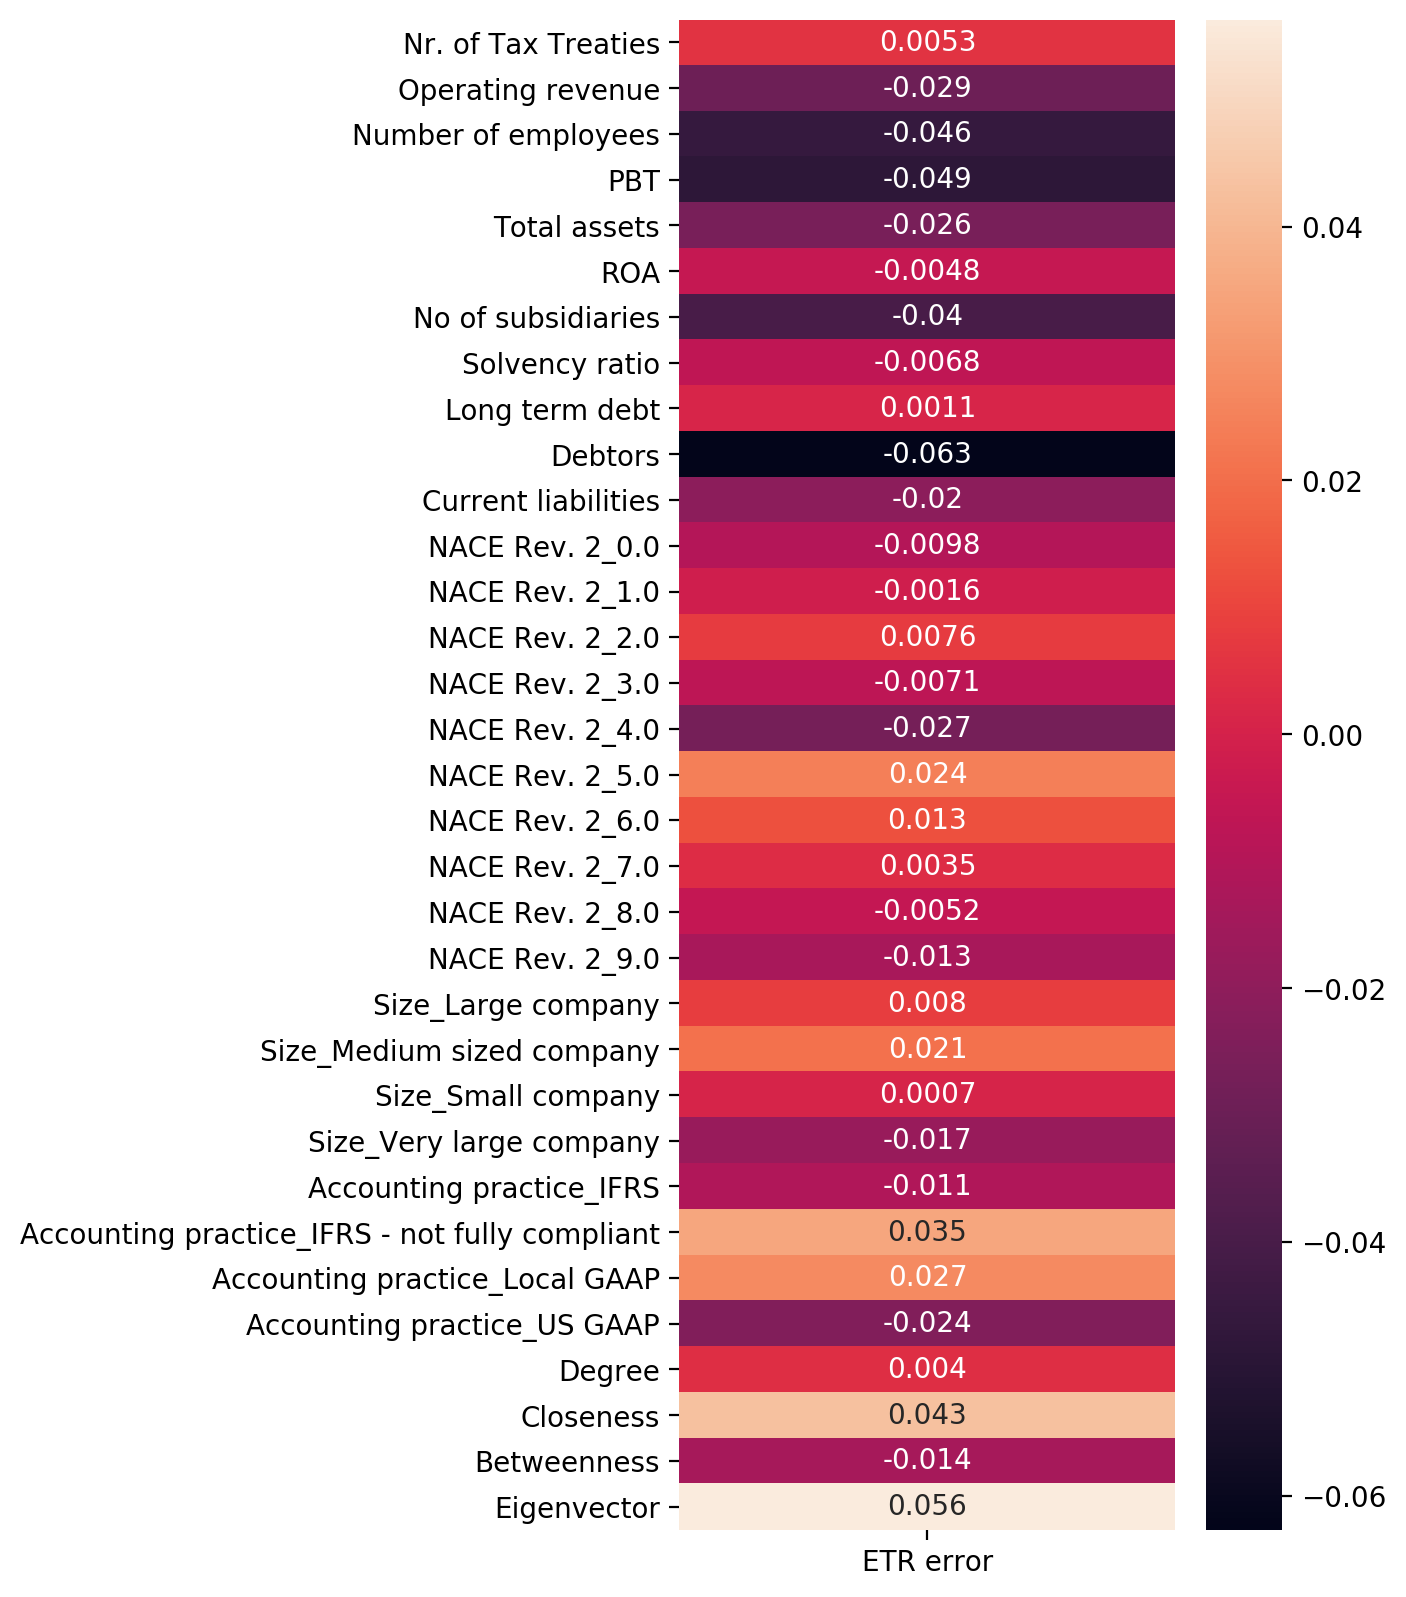

In [39]:
from matplotlib.pyplot import figure
y_error = pd.DataFrame(data = [(y_pred_winsor2-y_test_final_winsor2)]).T
y_error = pd.concat([X_test_final_winsor2, y_error], axis = 1)

cormat = y_error.corr()
round(cormat,3)

ETR_heatmap = cormat['ETR']
ETR_heatmap = pd.DataFrame(ETR_heatmap)
ETR_heatmap.rename(columns = {'ETR':'ETR error'}, inplace = True)
ETR_heatmap = ETR_heatmap.drop('ETR')

figure(figsize=(4, 10), dpi=200)
sns.heatmap(ETR_heatmap, annot = True)

In [34]:
ETR_heatmap.sort_values('ETR error')

,ETR error
Debtors,-0.062652
PBT,-0.048531
Number of employees,-0.045857
No of subsidiaries,-0.039984
Operating revenue,-0.029345
NACE Rev. 2_4.0,-0.027178
Total assets,-0.026163
Accounting practice_US GAAP,-0.023635
Current liabilities,-0.020490
Size_Very large company,-0.017138
